In [65]:
from collections import defaultdict
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from urb_frame import *
from urb_sequence import *
from plotly.offline import *
from plotly.graph_objs import Scatter, Figure, Layout
init_notebook_mode(connected=True)

Read frames from KITTI sequence 00 into a list of frames (frame).

In [96]:
%%time
LEFTDIR = '/data/urbinn/datasets/kitti/sequences/00/image_2'
RIGHTDIR = '/data/urbinn/datasets/kitti/sequences/00/image_3'

frame = []
for frameid in range(150):
    print(frameid)
    filename = '%06d.png'%(frameid)
    left_frame = Frame(LEFTDIR + '/' + filename)
    left_frame.get_framepoints()
    frame.append(left_frame)
    left_frame.read_corresponding(RIGHTDIR)
    left_frame.compute_depth()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
CPU times: user 4min 51s, sys: 11.3 s, total: 5min 3s
Wall time: 2min 36s


We can also manually compute the Depth of the points and show these

Turn the list of frames into a sequence. The first frame is automatically taken as the KeyFrame and its FramePoints are rerieved, depth is estimated, only the most confident points are kept.

If a new frame is added and its pose can not be reliably determined, the previous frame is turned in and they are tracked in the other frames.

In [97]:
seq = create_sequence(frame)

In [86]:
kf = seq.keyframes[2]
kf.get_pose()

array([[  9.99894537e-01,  -2.24523238e-03,   1.43482815e-02,
         -4.63461489e-03],
       [  2.21789896e-03,   9.99995696e-01,   1.92062440e-03,
          1.02355547e-02],
       [ -1.43525320e-02,  -1.88859881e-03,   9.99895214e-01,
         -2.36522893e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]])

In [69]:
kf.get_pose_wrt(seq.keyframes[0])

array([[  9.99494576e-01,  -1.65213557e-03,   3.17468624e-02,
         -9.00927604e-02],
       [  1.42382033e-03,   9.99972972e-01,   7.21300308e-03,
          1.13086799e-02],
       [ -3.17579212e-02,  -7.16415563e-03,   9.99469914e-01,
         -5.29998042e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]])

In [70]:
def plot_frame(frame):
    coords = frame.get_framepoints_xyz()
    layout = Layout(
                    scene = dict(
                    xaxis = dict(
                        nticks=4, range = [-100,100], mirror='ticks'),
                    yaxis = dict(
                        nticks=4, range = [-100, 100],),
                    zaxis = dict(
                        nticks=4, range = [0,200],),),
                    width=900,
                    height=300,
                    margin=dict(
                    r=20, l=10,
                    b=10, t=10)
                  )
    scatter = Scatter(x=-coords[:,0], y=coords[:,2], mode='markers', marker=dict(size=2))
    iplot(dict(data=[scatter], layout=layout))



In [71]:
plot_frame(frame[0]);

In [91]:
totalKF = len(seq.keyframes)
trajectoryXZ = []

for frame in seq.keyframes[:18]:
    print(frame)
    pose = frame.get_pose_wrt(seq.keyframes[0])
    x = pose[0][3] + 50
    z = pose[2][3] + 50
    trajectoryXZ.append([x, z])
    
print(trajectoryXZ)

[[50.0, 50.0], [49.955692991078813, 47.064830874045761], [49.909907239643509, 44.700019576592062], [49.937919726276448, 45.103528790903994], [49.930998230068447, 45.755764507885793], [49.983294001140401, 45.707899314424495], [50.004680367909032, 44.75509858713113], [50.018950819194714, 44.543586689825162], [50.084947557962707, 44.369001419807425], [50.06121653388891, 45.24104728339686], [50.044263635516856, 46.15891245559866], [50.048408779499084, 47.109154269875873], [49.999503152608284, 47.059934532247695], [49.949886641060687, 45.996446201636481], [50.003240338812624, 45.946253665218762], [49.994996102318318, 44.957598520017783], [49.919192727088905, 44.942018017640706], [49.885207166351265, 46.011722258589735]]


In [102]:
seq_counts = len(seq.keyframes)

In [114]:
trajectoryXZ = []
points = []

for frame in seq.keyframes[:30]:
    pose = frame.get_pose()
    if pose is not None:
        points_new = []
        for p in points:
            p = np.dot(pose, p)
            points_new.append(p)
        points = points_new
        new_point = np.array([0,0,0,1.0])
        points.append(new_point)
  
    
for p in points:
    print(p)
    x = p[0] + 50
    z = p[2] + 50
    trajectoryXZ.append([x, z])

[ -0.74524134   0.66241154 -51.31370374   1.        ]
[ -0.54223445   0.60639489 -48.38573233   1.        ]
[ -0.44369951   0.56013488 -46.02298288   1.        ]
[ -0.35605277   0.51862178 -43.49288396   1.        ]
[ -0.29561259   0.4943446  -41.78084011   1.        ]
[ -0.27461041   0.46285158 -39.20207528   1.        ]
[ -0.23590803   0.48433275 -36.53574056   1.        ]
[ -0.25245232   0.46214663 -33.74535061   1.        ]
[ -0.28374816   0.4244705  -30.90461913   1.        ]
[ -0.28339594   0.38252344 -28.98665638   1.        ]
[ -0.29649039   0.34478016 -27.06331444   1.        ]
[ -0.29761374   0.31260216 -26.09508581   1.        ]
[ -0.251262     0.27987255 -24.12372619   1.        ]
[ -0.18480851   0.22695582 -22.09355355   1.        ]
[ -0.18912439   0.20073691 -20.07068168   1.        ]
[ -0.10881653   0.18210638 -17.05149848   1.        ]
[ -0.06217497   0.16268066 -15.01377298   1.        ]
[  0.02990024   0.29371384 -13.06325687   1.        ]
[  0.03797455   0.19517705 -

In [115]:
trajectoryXZ

[[49.254758655764732, -1.3137037423036588],
 [49.457765546105392, 1.6142676665281073],
 [49.556300488630775, 3.977017123404373],
 [49.643947232558048, 6.5071160423705052],
 [49.704387412500921, 8.2191598882918484],
 [49.72538958926237, 10.797924723712114],
 [49.764091969051286, 13.464259443133606],
 [49.74754768232377, 16.254649385051572],
 [49.716251842129715, 19.095380866401324],
 [49.716604057608677, 21.013343620502525],
 [49.703509614247579, 22.936685561900546],
 [49.702386261043912, 23.904914193625444],
 [49.748737999609446, 25.876273814526485],
 [49.815191493462429, 27.906446445740723],
 [49.810875607553591, 29.929318322721905],
 [49.891183474704945, 32.948501517961645],
 [49.937825034400085, 34.986227023435482],
 [50.029900238944521, 36.93674313411357],
 [50.037974548984685, 38.992755901099564],
 [50.044956289300274, 41.042517082498392],
 [49.982056859255621, 43.944238008490302],
 [50.000977041068779, 45.935700534407793],
 [49.995029258551106, 46.929202563472352],
 [50.0, 50.0]]

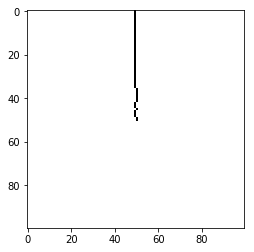

In [118]:
# Create a blank image
img = np.zeros((100, 100, 3), np.uint8) 
img[:] = 255 #or img.fill(255)

# Draw a black line with thickness of 2 px
for i in range(1,len(trajectoryXZ)):
    cv2.line(img, (int(trajectoryXZ[i - 1][0]), int(trajectoryXZ[i - 1][1])), (int(trajectoryXZ[i][0]), int(trajectoryXZ[i][1])), (0, 0, 0), 1)
plt.imshow(img)